In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
creadit_data = pd.read_csv('../Hyperparameter Tuning/Dataset/credit-card-full.csv')


In [3]:
creadit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
from sklearn.model_selection import train_test_split
X = creadit_data.drop('default payment next month', axis=1)
y = creadit_data['default payment next month']
X_test, X_train, y_test, y_train = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import RandomizedSearchCV


In [10]:
learn_rate_list = np.linspace(0.001, 2, 150)
min_sample_leaf_list = list(range(1, 51))

In [11]:
# Create list of Combinations
from itertools import product

In [12]:
combination_list = [list(x) for x in product(learn_rate_list, min_sample_leaf_list)]

In [14]:
# Coose 100 random combinations
random_combination_index = np.random.choice(range(0, len(combination_list)), 100, replace=False)
combination_random_chosen = [combination_list[x] for x in random_combination_index]

In [16]:
numbercombs = len(combination_random_chosen)
print(numbercombs)

100


Building Random Search Object

In [17]:

learn_rate_list = np.linspace(0.001, 2, 150)
min_sample_leaf_list = list(range(1, 51))


In [19]:
param_grid = {
    'learning_rate': learn_rate_list,
    'min_samples_leaf': min_sample_leaf_list}


In [20]:
number_models = 10

In [29]:
random_GBM_class = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=number_models,
    scoring='roc_auc',
    n_jobs=4,
    cv=10,
    refit=True,
    return_train_score=True,
    random_state=42)

In [30]:
random_GBM_class.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=4,
                   param_distributions={'learning_rate': array([1.00000000e-03, 1.44161074e-02, 2.78322148e-02, 4.12483221e-02,
       5.46644295e-02, 6.80805369e-02, 8.14966443e-02, 9.49127517e-02,
       1.08328859e-01, 1.21744966e-01, 1.35161074e-01, 1.48577181e-01,
       1.61993289e-01, 1.75409396e-01, 1.88825503e-01, 2.022416...
       1.82559060e+00, 1.83900671e+00, 1.85242282e+00, 1.86583893e+00,
       1.87925503e+00, 1.89267114e+00, 1.90608725e+00, 1.91950336e+00,
       1.93291946e+00, 1.94633557e+00, 1.95975168e+00, 1.97316779e+00,
       1.98658389e+00, 2.00000000e+00]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...]},
                   random_state=42, return_train_score=True, scoring='roc_auc')

Analyzing Outputs

In [26]:
rand_X = list(random_GBM_class.cv_results_['param_learning_rate'])
rand_Y = list(random_GBM_class.cv_results_['param_min_samples_leaf'])

In [27]:
x_lims = [np.min(learn_rate_list), np.max(learn_rate_list)]
y_lims = [np.min(min_sample_leaf_list), np.max(min_sample_leaf_list)]

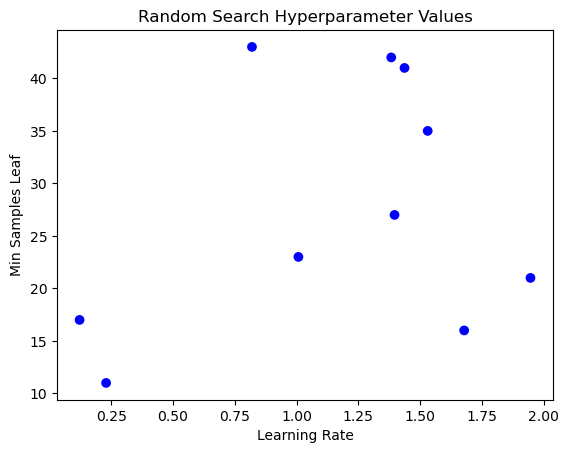

In [28]:
plt.scatter(rand_X, rand_Y, c=['blue']*10)
plt.gca().set(xlabel='Learning Rate', ylabel='Min Samples Leaf', title = 'Random Search Hyperparameter Values')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
fc_grid = {
    'max_depth': list(range(5, 26)),
    'max_features': ['auto', 'sqrt']
    }

In [33]:
random_rf_class = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=fc_grid,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=4,
    cv=10,
    refit=True,
    return_train_score=True)

In [34]:
random_rf_class.fit(X_train, y_train)

c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\fahad\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=4,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25],
                                        'max_features': ['auto', 'sqrt']},
                   return_train_score=True, scoring='roc_auc')

In [35]:
random_rf_class.cv_results_['param_max_depth']


masked_array(data=[7, 5, 13, 17, 24],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object)

In [36]:
random_rf_class.cv_results_['param_max_features']

masked_array(data=['auto', 'auto', 'sqrt', 'auto', 'sqrt'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object)